Nesse notebook eu faço algumas explorações nos dados, gerando alguns agrupamentos.

In [62]:
# Importa as bibliotecas necessárias

import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from matplotlib.text import Annotation
import seaborn as sns
import squarify as sqf
import sqlite3
import numpy as np

%matplotlib inline

In [2]:
# Abre os arquivos e gera os respectivos DataFrames
ver_rj = pd.read_csv("output/vereadores_2016_RJ.csv", encoding="latin-1")
vr = pd.DataFrame(ver_rj)

arquivo_zonas = pd.read_csv("src/secao_bairro.csv")
zn = pd.DataFrame(arquivo_zonas)

In [ ]:
# Cria uma lista com as duas tabelas
dataset = [ver_rj, zn]
nomes_tabelas = ['Vereadores', 'Zonas']

# Cria um banco de dados
con = sqlite3.connect("src/banco.db")
cur = con.cursor()

#for item in range(0,len(nomes_tabelas)):
#    cur.execute("""CREATE TABLE IF NOT EXISTS """ + nomes_tabelas[item] + """(""" + ",".join(nomes_tabelas[item])+""")""")

In [128]:
# Variáveis contando o total de eleitores
bairros = zn.groupby('bairro')['eleitores'].sum()
regioes = zn.groupby('regiao')['eleitores'].sum()
secoes = zn.groupby('secao')['eleitores'].sum()
zonas = zn.groupby('zona')['eleitores'].sum()

# Imprime amostra
zn.head(1)

,zona,bairro,secao,eleitores,regiao
0,1,SAUDE,15,193,CENTRO



Nas explorações abaixo, algumas considerações sobre as regiões da cidade. A princípio, podemos perceber que as zonas norte e oeste são as maiores em número de eleitores. Mas, também percebemos que essas regiões estão desagrupadas, então abaixo eu faço um agrupamento para termos um número total de eleitores por região da cidade como conhecemos.


               eleitores
regiao                  
ZONA NORTE       1373980
ZONA OESTE       1350657
ZONA SUL          575978
JACAREPAGUA       393852
GRANDE TIJUCA     380523
LEOPOLDINA        328038
CENTRO            173581
ILHA DO GOV       170992
BARRA             150444


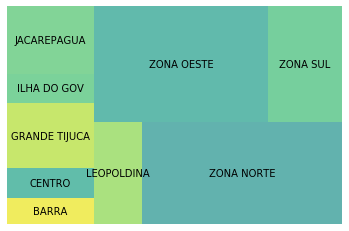

Total de Eleitores no município:  4898045


In [71]:
# Cria um novo dataframe a partir do agrupamento por regiões e ordena do maior para o menor
rg = pd.DataFrame(regioes)
print(rg.sort_values(by=['eleitores'], ascending=False))

# Desenha um treemap (utilizando a biblioteca squarify)
sqf.plot(sizes=rg.eleitores, label=rg.index, alpha=.7)
plt.axis('off')
plt.show()

# Imprime no número total de eleitores
print('Total de Eleitores no município: ', zn['eleitores'].sum())

Text(0, 0.5, 'Bairros')

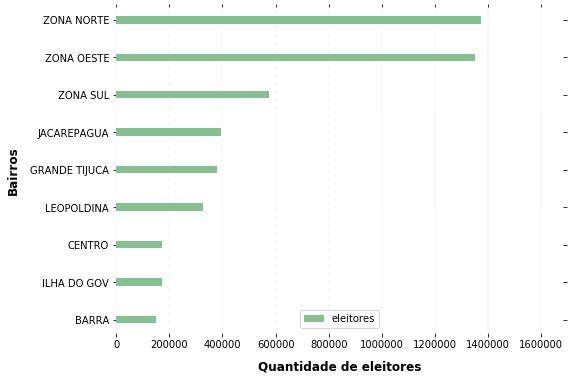

In [115]:
brs = pd.DataFrame(regioes)
brs_sorted = brs.sort_values('eleitores', ascending=True)

ax = brs_sorted.plot(kind='barh', figsize=(8, 6), color='#86bf91', zorder=2, width=.2)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="major", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Quantidade de eleitores", labelpad=10, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Bairros", labelpad=10, weight='bold', size=12)


In [3]:
# Filtro para separar veradores eleitos e não eleitos.

# Listas que guardam as variáveis de cada tipo de situação eleitoral
var_eleitos = ['ELEITO POR MÉDIA', 'ELEITO POR QP']
var_nao_eleitos = ['NÃO ELEITO', 'SUPLENTE']

# Resultado booleano gerado analisando se os dados das listas estão
# ou não nas linhas do Dataframe
if_eleitos = vr.DS_SIT_TOT_TURNO.isin(var_eleitos)
if_nao_eleitos = vr.DS_SIT_TOT_TURNO.isin(var_nao_eleitos)

# Variáveis para os filtros no Dataframe
eleitos = vr[if_eleitos]
nao_eleitos = vr[if_nao_eleitos]

# Imprime amostra
eleitos.head(1)

,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
334,RIO DE JANEIRO,214,Vereador,TARCÍSIO MOTTA,50,PSOL,ELEITO POR QP,1594


In [84]:
total_candidatos = vr.NM_URNA_CANDIDATO.nunique()
total_eleitos = eleitos.NM_URNA_CANDIDATO.nunique()
total_zonas = vr.NR_ZONA.nunique()
total_partidos = vr.SG_PARTIDO.nunique()
total_votos = vr.QT_VOTOS_NOMINAIS.sum()

print('Candidatos concorrentes:', total_candidatos)
print('Candidatos eleitos:', total_eleitos)
print('Candidatos não eleitos:', total_candidatos - total_eleitos)
print('Zonas eleitorais:', total_zonas)
print('Partidos:', total_partidos)
print('Votos totais:', total_votos)

votos_cand = eleitos.groupby('NM_URNA_CANDIDATO')['QT_VOTOS_NOMINAIS'].sum()
mais_vot = votos_cand.sort_values(ascending=False)

print('\n----------------------\n')
print('Dentre os eleitos, os cinco MAIS votados:')
print(mais_vot.head())
print('\n----------------------\n')
print('Dentre os eleitos, os cinco MENOS votados:')
print(mais_vot.tail())

ne_votos_cand = nao_eleitos.groupby('NM_URNA_CANDIDATO')['QT_VOTOS_NOMINAIS'].sum()
ne_votos_cand[ne_votos_cand.QT_VOTOS_NOMINAIS != 0]
ne_mais_vot = ne_votos_cand.sort_values(ascending=False)

print('\n----------------------\n')
print('Dentre NÃO os eleitos, os cinco MAIS votados:')
print(ne_mais_vot.head())
print('\n----------------------\n')
print('Dentre NÃO os eleitos, os cinco MENOS votados:')
print(ne_mais_vot.tail())

Candidatos concorrentes: 1606
Candidatos eleitos: 51
Candidatos não eleitos: 1555
Zonas eleitorais: 97
Partidos: 35
Votos totais: 2663612

----------------------

Dentre os eleitos, os cinco MAIS votados:
NM_URNA_CANDIDATO
CARLOS BOLSONARO    106657
TARCÍSIO MOTTA       90473
CESAR MAIA           71468
ROSA FERNANDES       57868
MARIELLE FRANCO      46502
Name: QT_VOTOS_NOMINAIS, dtype: int64

----------------------

Dentre os eleitos, os cinco MENOS votados:
NM_URNA_CANDIDATO
JAIR DA MENDES GOMES    8112
ZICO BACANA             7932
OTONI DE PAULA JR       7801
DAVID MIRANDA           7012
ITALO CIBA              6023
Name: QT_VOTOS_NOMINAIS, dtype: int64

----------------------

Dentre NÃO os eleitos, os cinco MAIS votados:
NM_URNA_CANDIDATO
RENATA GUERRA       16064
ÁTILA A. NUNES      14903
JOÃO CABRAL         14152
PROFESSOR UOSTON    13985
EDSON ZANATA        13668
Name: QT_VOTOS_NOMINAIS, dtype: int64

----------------------

Dentre NÃO os eleitos, os cinco MENOS votados:
NM_URN

Text(0, 0.5, ' ')

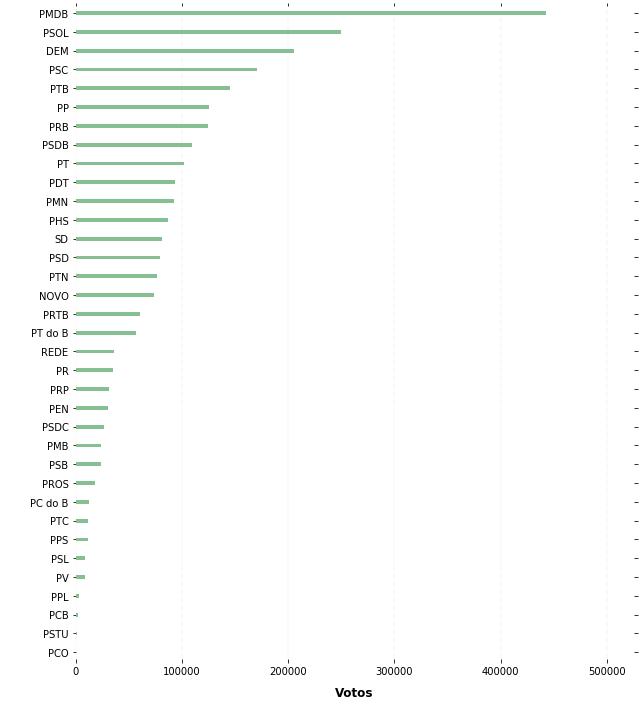

In [65]:
vp = vr.groupby('SG_PARTIDO')['QT_VOTOS_NOMINAIS'].sum()
votos_por_partido = vp.sort_values(ascending=True)



ax = votos_por_partido.plot(kind='barh', figsize=(10, 12), color='#86bf91', zorder=2, width=.2)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="major", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Votos", labelpad=10, weight='bold', size=12)

#Set y-axis label
ax.set_ylabel(" ", labelpad=10, weight='bold', size=12)

#print('\n----------------------\n')
#print('Candidatos por Partido:\n', cand_por_partido)

In [ ]:
cp = vr.groupby('SG_PARTIDO')['NM_URNA_CANDIDATO'].nunique()
cand_por_partido = cp.sort_values(ascending=False)



In [43]:
el2 = eleitos.set_index('NM_URNA_CANDIDATO')
el2.loc['MARIELLE FRANCO'].head()

,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NR_PARTIDO,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
NM_URNA_CANDIDATO,,,,,,,
MARIELLE FRANCO,RIO DE JANEIRO,170,Vereador,50,PSOL,ELEITO POR QP,1090
MARIELLE FRANCO,RIO DE JANEIRO,245,Vereador,50,PSOL,ELEITO POR QP,181
MARIELLE FRANCO,RIO DE JANEIRO,188,Vereador,50,PSOL,ELEITO POR QP,212
MARIELLE FRANCO,RIO DE JANEIRO,121,Vereador,50,PSOL,ELEITO POR QP,187
MARIELLE FRANCO,RIO DE JANEIRO,189,Vereador,50,PSOL,ELEITO POR QP,260


In [5]:
# Filtro partido por Zona Eleitoral
voto_zona = eleitos.SG_PARTIDO.isin(['PSOL'])
vz_total = eleitos[voto_zona]

benfica = vz_total[vz_total['NR_ZONA'] == 193]
benfica

,NM_MUNICIPIO,NR_ZONA,DS_CARGO,NM_URNA_CANDIDATO,NR_PARTIDO,SG_PARTIDO,DS_SIT_TOT_TURNO,QT_VOTOS_NOMINAIS
6199,RIO DE JANEIRO,193,Vereador,LEONEL BRIZOLA NETO,50,PSOL,ELEITO POR MÉDIA,149
21208,RIO DE JANEIRO,193,Vereador,DAVID MIRANDA,50,PSOL,ELEITO POR MÉDIA,30
30090,RIO DE JANEIRO,193,Vereador,PAULO PINHEIRO,50,PSOL,ELEITO POR QP,41
120136,RIO DE JANEIRO,193,Vereador,RENATO CINCO,50,PSOL,ELEITO POR QP,52
127389,RIO DE JANEIRO,193,Vereador,TARCÍSIO MOTTA,50,PSOL,ELEITO POR QP,329
152373,RIO DE JANEIRO,193,Vereador,MARIELLE FRANCO,50,PSOL,ELEITO POR QP,191


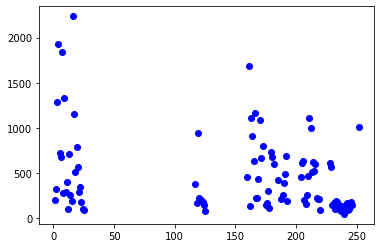

In [6]:
candidato = eleitos.NM_URNA_CANDIDATO.isin(['MARIELLE FRANCO'])
cand = eleitos[candidato]

#vz_total[vz_total['QT_VOTOS_NOMINAIS'] > 2000]


plt.scatter(cand.NR_ZONA, cand.QT_VOTOS_NOMINAIS, color='b')

Text(0.5, 1.0, 'Votos por Zona - Eleitos')

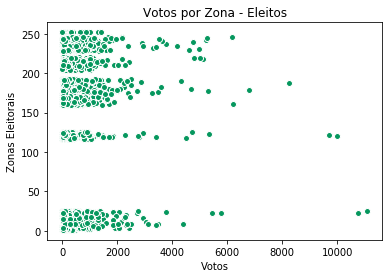

In [7]:
# Votos por Zona - eleitos
plt.scatter(eleitos.QT_VOTOS_NOMINAIS, eleitos.NR_ZONA,
            c='#06975e', edgecolors='#FFFFFF')
plt.xlabel('Votos')
plt.ylabel('Zonas Eleitorais')
plt.title('Votos por Zona - Eleitos')

NM_MUNICIPIO         155782
NR_ZONA              155782
DS_CARGO             155782
NM_URNA_CANDIDATO    155782
NR_PARTIDO           155782
SG_PARTIDO           155782
DS_SIT_TOT_TURNO     155782
QT_VOTOS_NOMINAIS    155782
dtype: int64

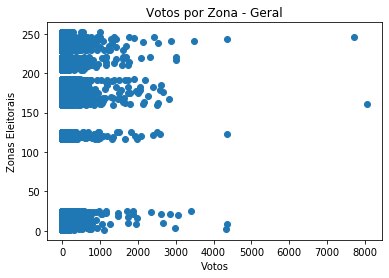

In [8]:
# Votos por Zona - não eleitos
plt.scatter(nao_eleitos.QT_VOTOS_NOMINAIS, nao_eleitos.NR_ZONA)
plt.xlabel('Votos')
plt.ylabel('Zonas Eleitorais')
plt.title('Votos por Zona - Geral')

vr.count()